# Exercise 4b - Image Morphology

The purpose of this exercise is to implement, test and validate different approaches to binary image morphological operation

In [24]:
from skimage import io, color
import numpy as np
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt

In [25]:
# Functions used

# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()
    
def apply_closing(binary, disk_sz):
    footprint = disk(disk_sz)
    closed = closing(binary, footprint)
    return closed

def apply_erosion(binary, disk_sz):
    footprint = disk(disk_sz)
    eroded = erosion(binary, footprint)
    return eroded

def apply_dilation(binary, disk_sz):
    footprint = disk(disk_sz)
    dilated = dilation(binary, footprint)
    return dilated

def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

### Exercise 1
We will start by computing a binary image from the lego image:

1. Read the image into im_org.
2. Convert the image to gray scale.
3. Find a threshold using Otsu's method.
4. Apply the treshold and generate a binary image bin_img.
5. Visualize the image using plot_comparison(im_org, bin_img, 'Binary image')


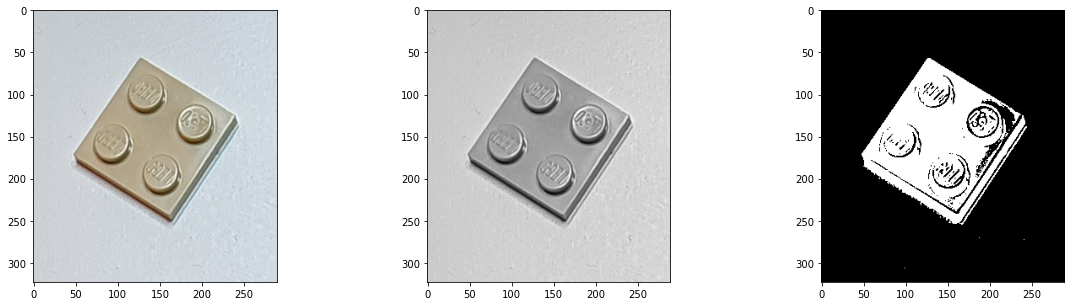

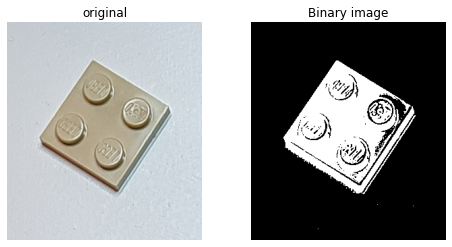

In [3]:
# 1. read image
lego5 = io.imread("data/lego_5.png")
# 2. convert to gray scale
lego5_gray = color.rgb2gray(lego5.copy())
# 3. find threshold with Otsu
thresh = threshold_otsu(lego5_gray)
# 4. Apply the threshold and cretae a binary image
bin_img = lego5_gray < thresh
# 5. plotting hte images 
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
ax[0].imshow(lego5, cmap = 'gray')
ax[1].imshow(lego5_gray, cmap = 'gray')
ax[2].imshow(bin_img, cmap = 'gray')
plt.show()
# 5. plotting using their function
plot_comparison(lego5, bin_img, 'Binary image')

### Exercise 2 
As can seen, the lego bruck is not segmented perfectly. There a holes in the segmentation. Let us see if we can do something about it

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


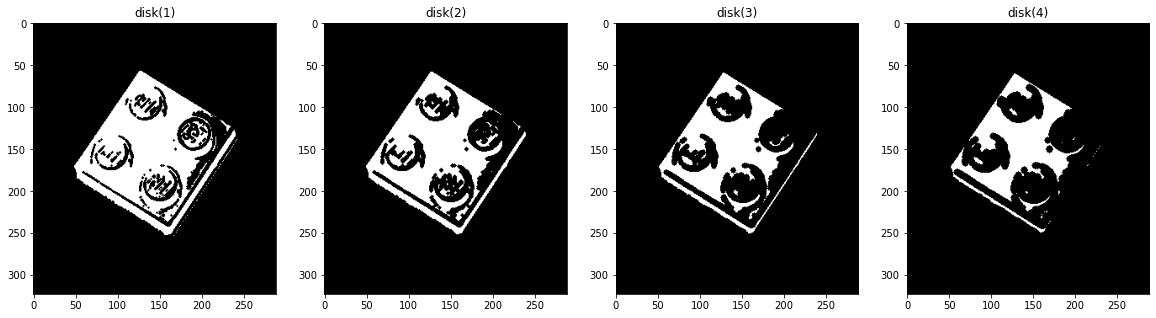

In [4]:
# We will start by creating a structuring element. In scikit-image they are called footprint. 
# A disk shaped footprint can be created by:
footprint = disk(2)
# Check the size and shape of the structuring element
print(footprint)
# The morphological operation erosion can remove small objects, seperate objects and make objects smaller. 
# Try it on the binary lego image:
eroded = erosion(bin_img, footprint)

#plot_comparison(bin_img, eroded, 'erosion')
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(erosion(bin_img, disk(1)), cmap = 'gray')
ax[0].set_title("disk(1)")
ax[1].imshow(erosion(bin_img, disk(2)), cmap = 'gray')
ax[1].set_title("disk(2)")
ax[2].imshow(erosion(bin_img, disk(3)), cmap = 'gray')
ax[2].set_title("disk(3)")
ax[3].imshow(erosion(bin_img, disk(4)), cmap = 'gray')
ax[3].set_title("disk(4)")
plt.show()


### Exercise 3 
The morphological operation dilation makes objects larger, closes holes and connects objects. Try it on the binary lego image:

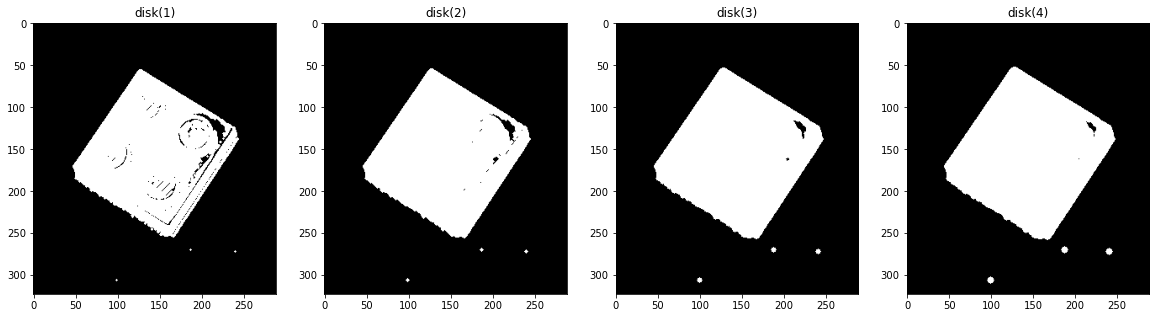

In [5]:
dilated = dilation(bin_img, footprint)
#plot_comparison(bin_img, dilated, 'dilation')

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(dilation(bin_img, disk(1)), cmap = 'gray')
ax[0].set_title("disk(1)")
ax[1].imshow(dilation(bin_img, disk(2)), cmap = 'gray')
ax[1].set_title("disk(2)")
ax[2].imshow(dilation(bin_img, disk(3)), cmap = 'gray')
ax[2].set_title("disk(3)")
ax[3].imshow(dilation(bin_img, disk(4)), cmap = 'gray')
ax[3].set_title("disk(4)")
plt.show()

### Exercise 4 
The morphological operation opening removes small objects without changing the size of the remaining objects. Try it on the binary lego image:

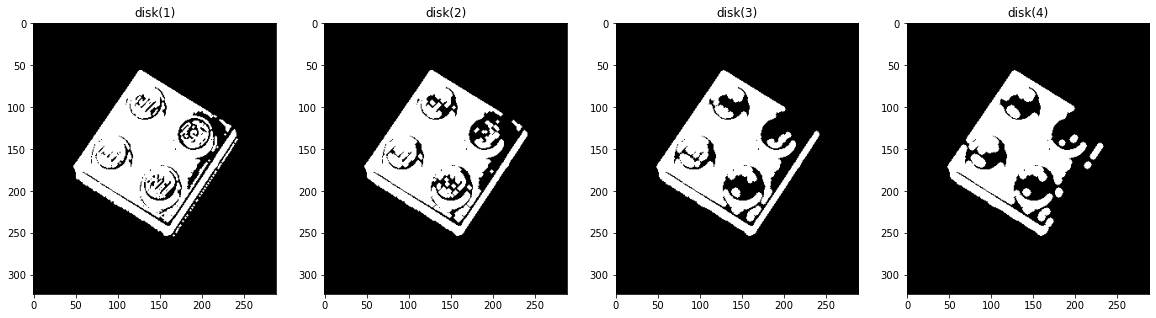

In [6]:
opened = opening(bin_img, footprint)
#plot_comparison(bin_img, opened, 'opening')
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(opening(bin_img, disk(1)), cmap = 'gray')
ax[0].set_title("disk(1)")
ax[1].imshow(opening(bin_img, disk(2)), cmap = 'gray')
ax[1].set_title("disk(2)")
ax[2].imshow(opening(bin_img, disk(3)), cmap = 'gray')
ax[2].set_title("disk(3)")
ax[3].imshow(opening(bin_img, disk(4)), cmap = 'gray')
ax[3].set_title("disk(4)")
plt.show()

### Exercise 5 
The morphological operation closing closes holes in objects without changing the size of the remaining objects. Try it on the binary lego image:

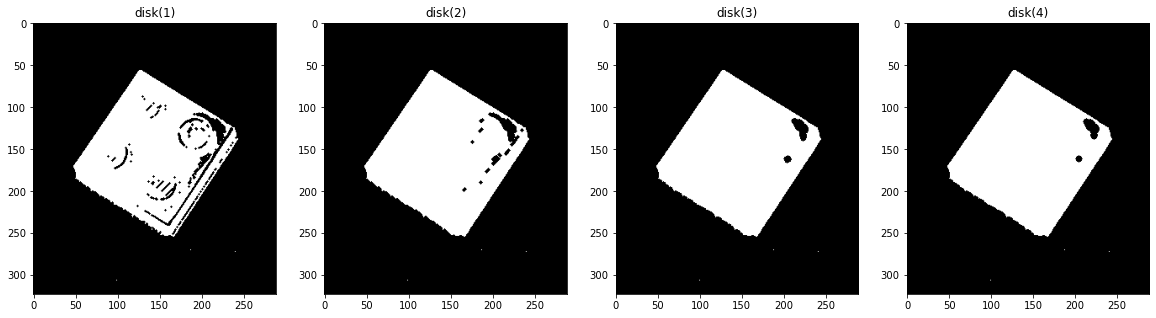

In [7]:
closed = closing(bin_img, footprint)
#plot_comparison(bin_img, closed, 'closing')

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(closing(bin_img, disk(1)), cmap = 'gray')
ax[0].set_title("disk(1)")
ax[1].imshow(closing(bin_img, disk(2)), cmap = 'gray')
ax[1].set_title("disk(2)")
ax[2].imshow(closing(bin_img, disk(3)), cmap = 'gray')
ax[2].set_title("disk(3)")
ax[3].imshow(closing(bin_img, disk(4)), cmap = 'gray')
ax[3].set_title("disk(4)")
plt.show()

### Exercise 6
Compute the outline of the binary image of the lego brick. What do you observe?

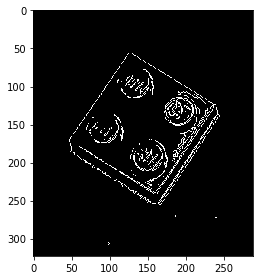

In [8]:
compted_outline = compute_outline(bin_img)
io.imshow(compted_outline)
io.show()


### Exercise 7 
Try the following:
1. Do an opening with a disk of size 1 on the binary lego image.
2. Do a closing with a disk of size 15 on the result of the opening.
3. Compute the outline and visualize it.

What do you observe and why does the result look like that?

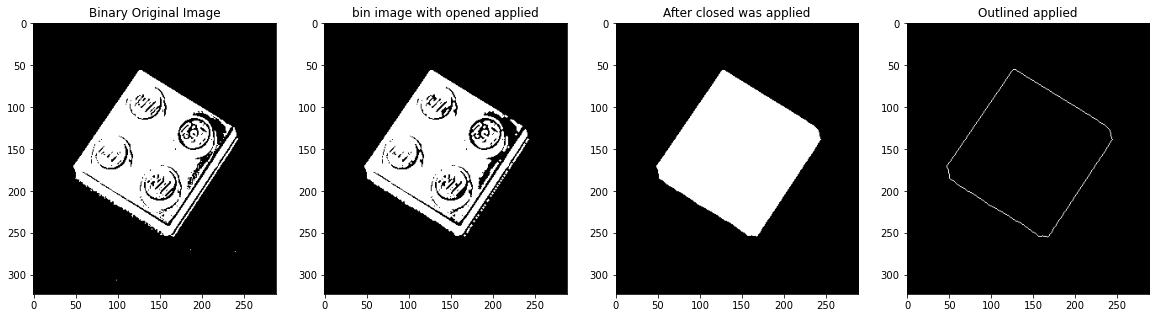

In [9]:
# 1. opening 
opened = opening(bin_img, disk(1))
# 2. closing of the opening image
closed = closing(opened, disk(15))
# 3. visulaize the images and the computed outline
outline = compute_outline(closed)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(bin_img, cmap = 'gray')
ax[0].set_title("Binary Original Image")
ax[1].imshow(opened, cmap = 'gray')
ax[1].set_title("bin image with opened applied")
ax[2].imshow(closed, cmap = 'gray')
ax[2].set_title("After closed was applied")
ax[3].imshow(outline, cmap = 'gray')
ax[3].set_title("Outlined applied")
plt.show()

### Exercise 8
Start by:
1. Reading the lego_7.png image and convert it to gray scale.
2. Compute a treshold using Otsu's method and apply it to the image.
3. Show the binary image together with the original.
4. Compute the outline of the binary image and show it with the binary image.

What do you observe?

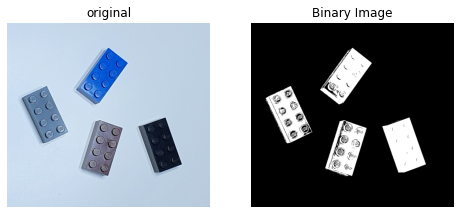

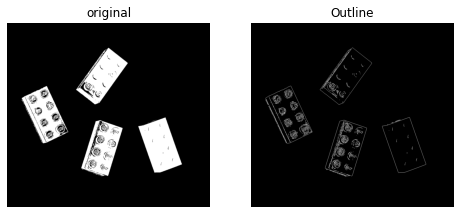

In [10]:
# 1. read images and convert to gray scale
lego7 = io.imread("data/lego_7.png")
lego7_gray = color.rgb2gray(lego7)

# 2. find threshold with Otsu and apply it 
thresh_lego7 = threshold_otsu(lego7_gray)
bin_lego7 = lego7_gray < thresh_lego7

# 3. Show binary and orginal 
plot_comparison(lego7, bin_lego7, 'Binary Image')

# 4. compute outline and show 
outline_lego7 = compute_outline(bin_lego7)
plot_comparison(bin_lego7, outline_lego7, 'Outline')


### Exercise 9
We would like to find a way so only the outline of the entire brick is computed. So for each lego brick there should only be one closed curve.

Try using the closing operations and find out which size of footprint that gives the desired result?

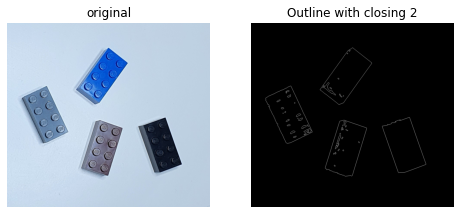

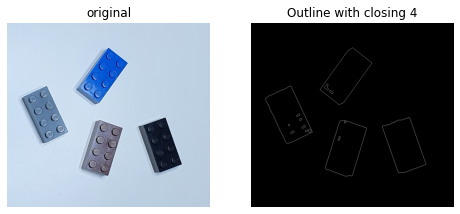

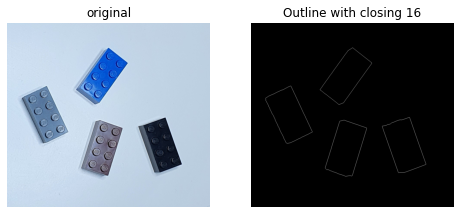

In [11]:
#closed = closing(bin_lego7, disk(15))
#outline_closed = compute_outline(closed)
#plot_comparison(bin_lego7,outline_closed, 'outline with closed apllied' )

for sz in [2, 4, 16]:
    closed = apply_closing(bin_lego7, sz)
    outline_img = compute_outline(closed)
    plot_comparison(lego7, outline_img, f'Outline with closing {sz}')

### Exercise 10 
Apply the above on the image lego_3 

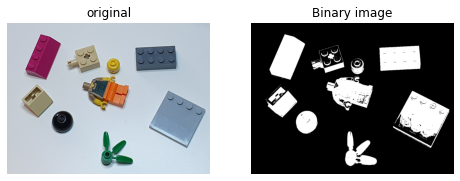

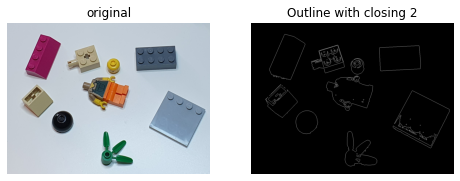

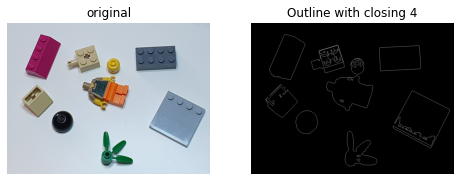

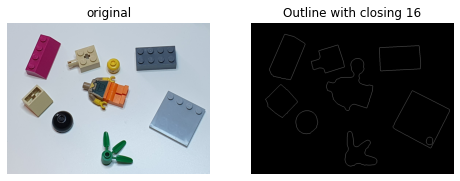

In [12]:
in_file = 'lego_3.png'
in_dir = "data/"
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = color.rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

for sz in [2, 4, 16]:
    closed = apply_closing(bin_img, sz)
    outline_img = compute_outline(closed)
    plot_comparison(im_org, outline_img, f'Outline with closing {sz}')

### Exercise 11 
1. reading the lego_9.png image and convert it to gray scale.
2. Compute a treshold using Otsu's method and apply it to the image.
3. Show the binary image together with the original.
4. Compute the outline of the binary image and show it with the binary image.

What do you observe?

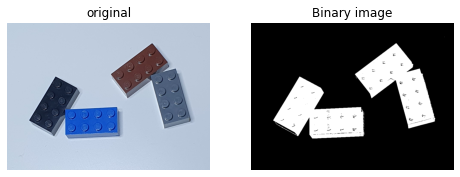

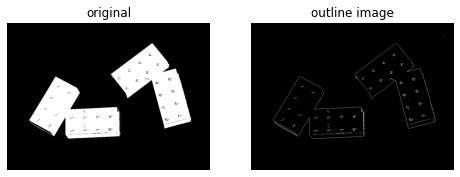

In [13]:
# 1. read and convert to gray
lego9 = io.imread('data/lego_9.png')
lego9_gray = color.rgb2gray(lego9)
# 2. compute thresh and apply 
thres_lego9 = threshold_otsu(im_gray)
bin_lego9 = lego9_gray < thres_lego9
# 3. show the binry and original
plot_comparison(lego9, bin_lego9, 'Binary image')
# compute outline and show binary and outline
outline_lego9 = compute_outline(bin_lego9)
plot_comparison(bin_lego9, outline_lego9, 'outline image')

#We see that the lego that are touching will be pilled in to 1 object 

### Exercise 12
Let us start by trying to remove the noise holes inside the lego bricks. Do that with an closing and find a good footprint size. Compute the outline and see what you observe?

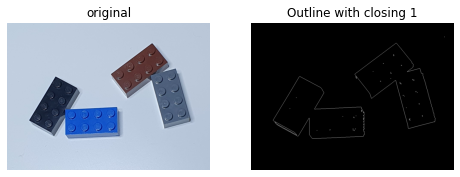

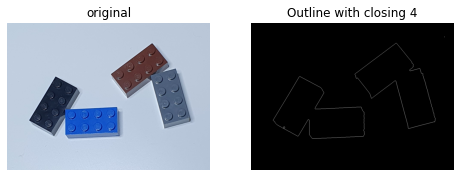

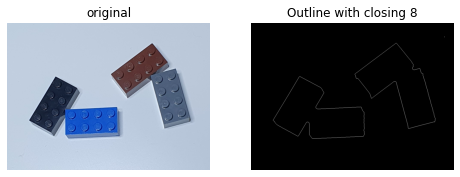

In [14]:
for sz in [1, 4, 5, 8]:
    closed = apply_closing(bin_lego9, sz)
    outline_img = compute_outline(closed)
    plot_comparison(lego9, outline_img, f'Outline with closing {sz}')
closed_lego9 = apply_closing(bin_lego9,5)

### Exercise 13
Now we will try to seperate the objects. Try using a erosion on the image that you repaired in exercise 12. You should probably use a rather large footprint. How large does it need to be in order to split the objects?

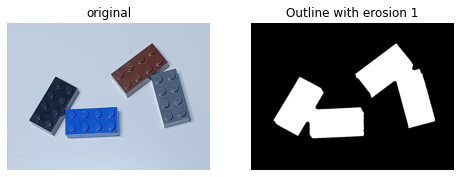

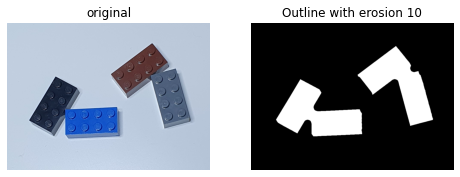

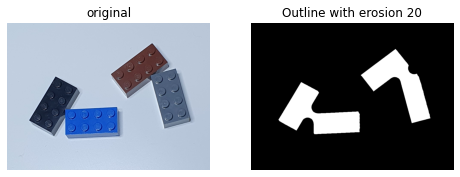

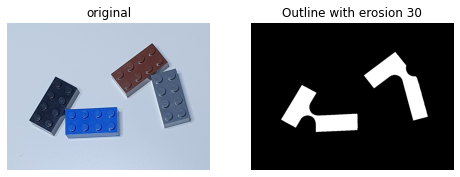

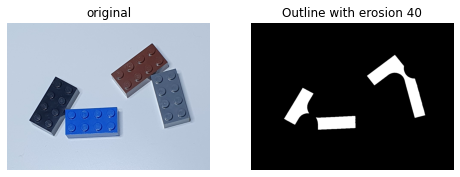

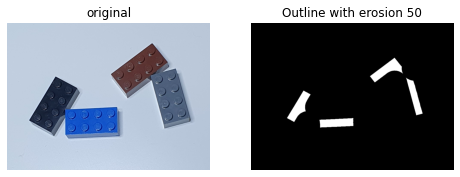

In [15]:
for sz in [1, 10, 20, 30, 40, 50]:
    erosed = apply_erosion(closed_lego9, sz)
    outline_img = compute_outline(erosed)
    plot_comparison(lego9, erosed, f'Outline with erosion {sz}')


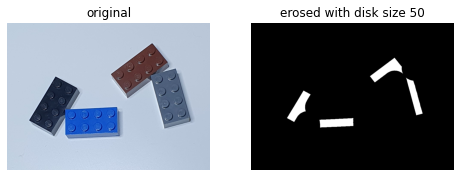

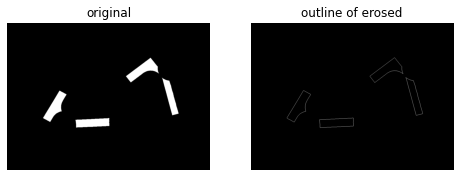

In [16]:
# From the above we have to do a disk size of 50 before they stop touching each other 
erosed_lego9 = apply_erosion(closed, 50)
plot_comparison(lego9, erosed, 'erosed with disk size 50')
plot_comparison(erosed, compute_outline(erosed), 'outline of erosed')

In [ ]:
closed = apply_closing(bin_img, 5)
eroded = apply_erosion(closed, 50)
plot_comparison(im_org, eroded, 'Closed and eroded image')
outline_img = compute_outline(eroded)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 14
The objects lost a lot of size in the previous step. Try to use dilate to make them larger. How large can you make them before they start touching?

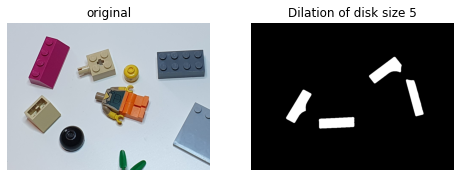

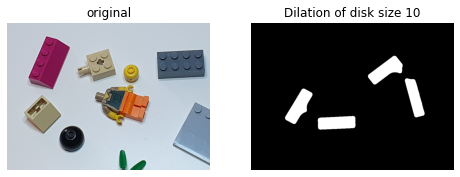

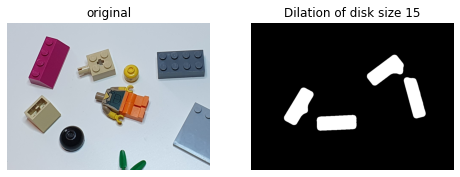

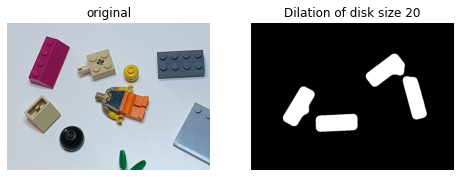

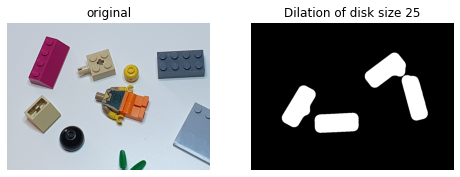

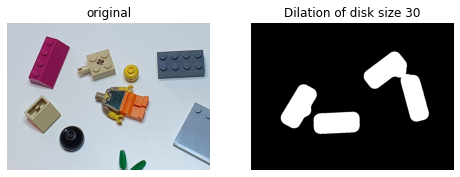

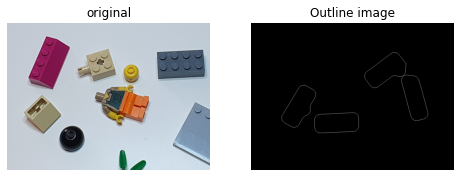

In [30]:
for sz in [5,10,15,20,25,30]:
    dilated = apply_dilation(eroded, sz)
    plot_comparison(im_org, dilated, f'Dilation of disk size {sz}')

dilated_lego9 = apply_dilation(eroded, 25)
outline_img = compute_outline(dilated_lego9)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 15
Use the previosly used methods to compute a binary image from the puzzle photo. What do you observe?

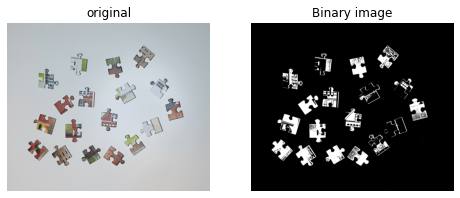

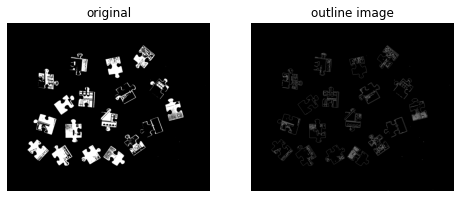

In [34]:
# 1. read and convert to gray
puzzle = io.imread('data/puzzle_pieces.png')
puzzle_gray = color.rgb2gray(puzzle)
# 2. compute thresh and apply 
thres_puzzle = threshold_otsu(puzzle_gray)
bin_puzzle = puzzle_gray < thres_puzzle
# 3. show the binry and original
plot_comparison(puzzle, bin_puzzle, 'Binary image')
# compute outline and show binary and outline
outline_puzzle = compute_outline(bin_puzzle)
plot_comparison(bin_puzzle, outline_puzzle, 'outline image')

### Exercise 16
Try to use a an opening with a large footprint to clean the binary. Compute the outline. Do we have good outlines for all the pieces?

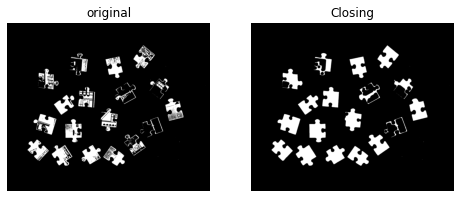

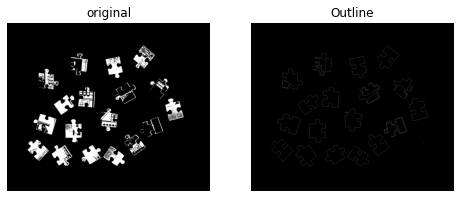

In [36]:
closed_puzzle = apply_closing(bin_puzzle, 15)
plot_comparison(bin_puzzle, closed_puzzle, 'Closing')

outline_puzzle = compute_outline(closed_puzzle)
plot_comparison(bin_puzzle, outline_puzzle, 'Outline')